In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
%matplotlib inline
sns.set_style("dark")
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
import datetime as dt
import matplotlib.dates as mdates

## From Part 1: 

In [4]:
from subprocess import check_output
df=pd.read_csv('crypto-markets.csv',index_col='date',parse_dates=True)
df.tail()

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2018-05-20,aston,ATX,Aston,1645,0.174143,0.174143,0.157184,0.167866,854900.0,0.0,0.6299,0.02
2018-05-21,aston,ATX,Aston,1645,0.168075,0.169099,0.165706,0.166054,845673.0,0.0,0.1026,0.00
2018-05-22,aston,ATX,Aston,1645,0.156766,0.157625,0.142146,0.150380,486511.0,0.0,0.5319,0.02
2018-05-23,aston,ATX,Aston,1645,0.147663,0.169331,0.131630,0.138031,1411730.0,0.0,0.1698,0.04
2018-05-24,aston,ATX,Aston,1645,0.142871,0.157774,0.139641,0.148132,821824.0,0.0,0.4683,0.02


In [5]:
df.replace([np.inf,-np.inf],np.nan)
df.dropna()
df.columns=['Slug','Symbol','Name','Rank Now','Open','High','Low','Close','Volume','Market','Close Ratio','Spread']

In [6]:
#Of the 13 available columns, I'm considering 6 for feature selection.
df_closeup=df[['Name','Symbol','Open','High','Low','Close','Volume','Market']]

In [7]:
BTC_data=df_closeup[df_closeup['Name']=='Bitcoin']
ETH_data=df_closeup[df_closeup['Name']=='Ethereum']
RIP_data=df_closeup[df_closeup['Name']=='Ripple']
#we now have the tables for three top-ranked cryptocurrencies

In [12]:
#opting to drop zero values in columns 'Volume' and 'Market'
BTC_data=BTC_data.iloc[243:]
RIP_data=RIP_data.iloc[145:]
ETH_data=ETH_data.iloc[1:]

In [9]:
BTC_data['Avg.']=(BTC_data['Open']+BTC_data['High']+BTC_data['Low']+BTC_data['Close'])/4
BTC_data['Projection']=BTC_data['Close'].shift(-14)
ETH_data['Avg.']=(ETH_data['Open']+ETH_data['High']+ETH_data['Low']+ETH_data['Close'])/4
ETH_data['Projection'] =ETH_data['Close'].shift(-14)
RIP_data['Avg.']=(RIP_data['Open']+RIP_data['High']+RIP_data['Low']+RIP_data['Close'])/4
RIP_data['Projection']=RIP_data['Close'].shift(-14)

In [13]:
#This code will last us through all three models
#X and Y are for Bitcoin, X1 and Y1 for Ethereum, X2 and Y2 for Ripple
BTC_data.dropna(inplace=True)
BTC_data.drop(['Name','Symbol'],axis=1,inplace=True)
X=BTC_data.drop('Projection',axis=1)
X=preprocessing.scale(X)
Y=BTC_data['Projection']
ETH_data.drop(['Name','Symbol'],axis=1,inplace=True)
ETH_data.dropna(inplace=True)
X1=ETH_data.drop('Projection',axis=1)
X1=preprocessing.scale(X1)
Y1=ETH_data['Projection']
RIP_data.drop(['Name','Symbol'],axis=1,inplace=True)
RIP_data.dropna(inplace=True)
X2=RIP_data.drop('Projection',axis=1)
X2=preprocessing.scale(X2)
Y2=RIP_data['Projection']

/Users/samuelkim/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/samuelkim/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/samuelkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/samuelkim/anaconda3/lib/python3.6/site-p

## Models

### Random Forest Regression

In [20]:
X_train,X_test,Y_train,Y_test=cross_validation.train_test_split(X,Y,test_size =0.2)
X1_train,X1_test,Y1_train,Y1_test=cross_validation.train_test_split(X1,Y1,test_size =0.2)
X2_train,X2_test,Y2_train,Y2_test=cross_validation.train_test_split(X2,Y2,test_size =0.2)

In [21]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(n_estimators=150,random_state=101)
RFR.fit(X_train,Y_train)
accuracy=RFR.score(X_test,Y_test)
accuracy=accuracy*100
accuracy=float('{0:.1f}'.format(accuracy))
print('Accuracy is: ',accuracy,'%')
preds=RFR.predict(X_test)
print('The predicted price for BTC is: ',preds[1],'The real price for BTC is:',Y_test[1])

Accuracy is:  90.6 %
The predicted price for BTC is:  9414.490199999995 The real price for BTC is: 9325.18


In [22]:
from sklearn.ensemble import RandomForestRegressor
RFR1=RandomForestRegressor(n_estimators=150,random_state=101)
RFR1.fit(X1_train,Y1_train)
accuracy1=RFR1.score(X1_test,Y1_test)
accuracy1=accuracy1*100
accuracy1=float('{0:.1f}'.format(accuracy1))
print('Accuracy is: ',accuracy1,'%')
preds1=RFR1.predict(X1_test)
print('The predicted price for ETH is: ',preds1[1],'The real price for ETH is:',Y1_test[1])

Accuracy is:  93.7 %
The predicted price for ETH is:  10.150999999999998 The real price for ETH is: 10.25


In [23]:
from sklearn.ensemble import RandomForestRegressor
RFR2=RandomForestRegressor(n_estimators=150,random_state=101)
RFR2.fit(X2_train,Y2_train)
accuracy2=RFR2.score(X2_test,Y2_test)
accuracy2=accuracy2*100
accuracy2=float('{0:.1f}'.format(accuracy2))
print('Accuracy is: ',accuracy2,'%')
preds2=RFR2.predict(X2_test)
print('The predicted price for RIP is: ',preds2[1],'The real price for RIP is:',Y2_test[1])

Accuracy is:  79.6 %
The predicted price for RIP is:  0.006488279821405315 The real price for RIP is: 0.0066760000000000005


Although the predicted price (especially for BTC) seems off, the accuracy for Random Forest Regression seem far more consistently accuracte (recall the cross val scores for Ripple). We will choose RFR as our model for the final step of our Capstone - predicting Cryptocurrency costs between May 24 and June 6 2016. 

## Predictions

In [30]:
from datetime import timedelta
#Bitcoin
X_14=X[-14:]
predict=RFR.predict(X_14)
last=BTC_data.iloc[-1].name
modified=last+timedelta(days=1)
date=pd.date_range(modified,periods=14,freq='D')
df_A=pd.DataFrame(predict,columns=['Prediction'],index=date)
BTC_pred=BTC_data.append(df_A)
BTC_pred.tail(14)

/Users/samuelkim/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,Avg.,Close,High,Low,Market,Open,Prediction,Projection,Volume
2018-05-24,NaN,NaN,NaN,NaN,NaN,NaN,7841.755067,NaN,NaN
2018-05-25,NaN,NaN,NaN,NaN,NaN,NaN,8109.042933,NaN,NaN
2018-05-26,NaN,NaN,NaN,NaN,NaN,NaN,7653.879400,NaN,NaN
2018-05-27,NaN,NaN,NaN,NaN,NaN,NaN,7545.018133,NaN,NaN
2018-05-28,NaN,NaN,NaN,NaN,NaN,NaN,7880.566733,NaN,NaN
2018-05-29,NaN,NaN,NaN,NaN,NaN,NaN,7664.850067,NaN,NaN
2018-05-30,NaN,NaN,NaN,NaN,NaN,NaN,7949.470733,NaN,NaN
2018-05-31,NaN,NaN,NaN,NaN,NaN,NaN,7587.255333,NaN,NaN
2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN,8466.961933,NaN,NaN
2018-06-02,NaN,NaN,NaN,NaN,NaN,NaN,10126.978867,NaN,NaN


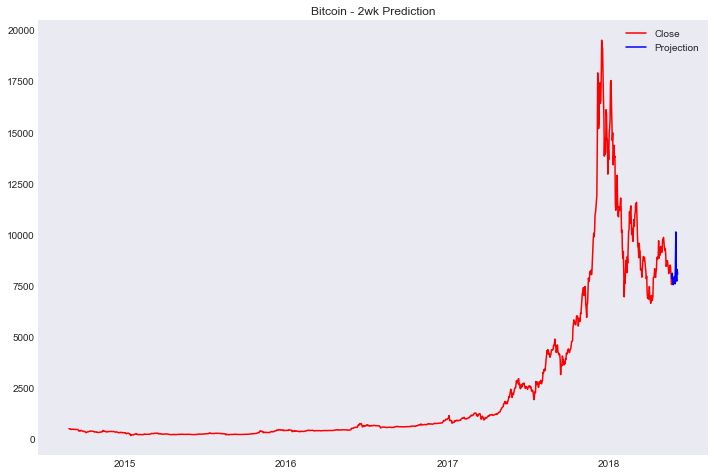

In [25]:
BTC_pred['Close'].plot(figsize=(12,8),label='Close',color='red')
BTC_pred['Prediction'].plot(label='Projection',color='blue')
plt.title('Bitcoin - 2wk Prediction')
plt.legend()
plt.show()

In [26]:
#Ethereum
X1_14=X1[-14:]
predict1=RFR1.predict(X1_14)
last=ETH_data.iloc[-1].name
modified=last+timedelta(days=1)
date=pd.date_range(modified,periods=14,freq='D')
df_B=pd.DataFrame(predict1,columns=['Prediction'],index=date)
ETH_pred=ETH_data.append(df_B)
ETH_pred.tail(14)

/Users/samuelkim/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,Avg.,Close,High,Low,Market,Open,Prediction,Projection,Volume
2018-05-24,NaN,NaN,NaN,NaN,NaN,NaN,921.589067,NaN,NaN
2018-05-25,NaN,NaN,NaN,NaN,NaN,NaN,692.711733,NaN,NaN
2018-05-26,NaN,NaN,NaN,NaN,NaN,NaN,628.275600,NaN,NaN
2018-05-27,NaN,NaN,NaN,NaN,NaN,NaN,612.574333,NaN,NaN
2018-05-28,NaN,NaN,NaN,NaN,NaN,NaN,649.895667,NaN,NaN
2018-05-29,NaN,NaN,NaN,NaN,NaN,NaN,746.315933,NaN,NaN
2018-05-30,NaN,NaN,NaN,NaN,NaN,NaN,676.882733,NaN,NaN
2018-05-31,NaN,NaN,NaN,NaN,NaN,NaN,677.422667,NaN,NaN
2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN,632.647667,NaN,NaN
2018-06-02,NaN,NaN,NaN,NaN,NaN,NaN,615.627333,NaN,NaN


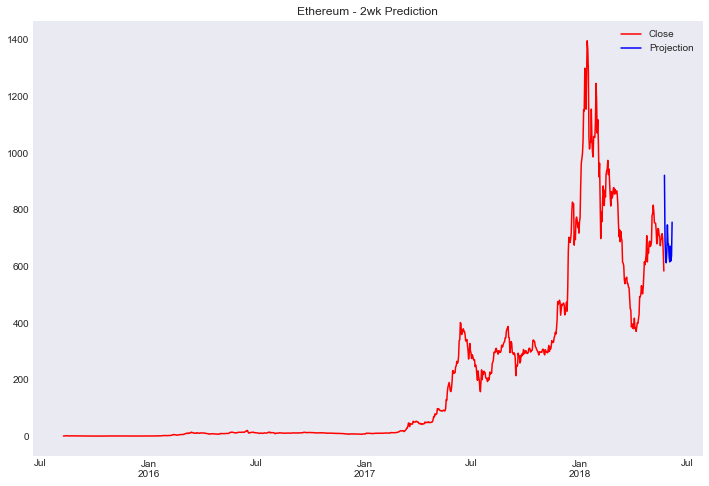

In [27]:
ETH_pred['Close'].plot(figsize=(12,8),label='Close',color='red')
ETH_pred['Prediction'].plot(label='Projection',color='blue')
plt.title('Ethereum - 2wk Prediction')
plt.legend()
plt.show()

In [28]:
#Ripple 
X2_14=X2[-14:]
predict2=RFR2.predict(X2_14)
last=RIP_data.iloc[-1].name
modified=last+timedelta(days=1)
date=pd.date_range(modified,periods=14,freq='D')
df_C=pd.DataFrame(predict2,columns=['Prediction'],index=date)
RIP_pred=RIP_data.append(df_C)
RIP_pred.tail(14)

/Users/samuelkim/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,Avg.,Close,High,Low,Market,Open,Prediction,Projection,Volume
2018-05-24,NaN,NaN,NaN,NaN,NaN,NaN,0.630382,NaN,NaN
2018-05-25,NaN,NaN,NaN,NaN,NaN,NaN,0.750121,NaN,NaN
2018-05-26,NaN,NaN,NaN,NaN,NaN,NaN,0.647728,NaN,NaN
2018-05-27,NaN,NaN,NaN,NaN,NaN,NaN,0.606556,NaN,NaN
2018-05-28,NaN,NaN,NaN,NaN,NaN,NaN,0.657073,NaN,NaN
2018-05-29,NaN,NaN,NaN,NaN,NaN,NaN,0.598422,NaN,NaN
2018-05-30,NaN,NaN,NaN,NaN,NaN,NaN,0.609281,NaN,NaN
2018-05-31,NaN,NaN,NaN,NaN,NaN,NaN,0.602900,NaN,NaN
2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN,0.621608,NaN,NaN
2018-06-02,NaN,NaN,NaN,NaN,NaN,NaN,0.646666,NaN,NaN


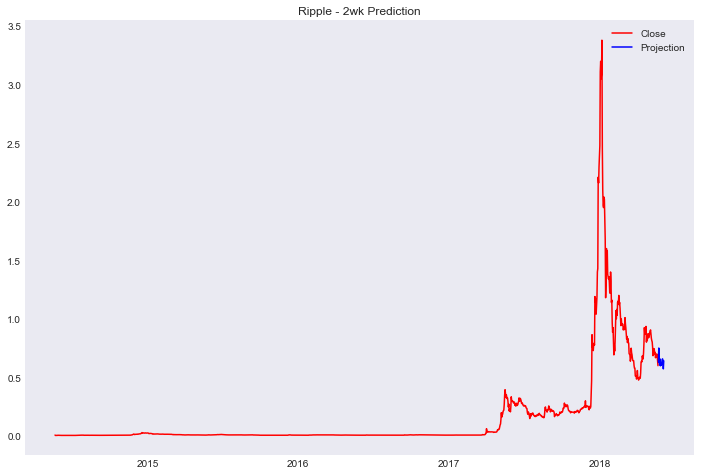

In [29]:
RIP_pred['Close'].plot(figsize=(12,8),label='Close',color='red')
RIP_pred['Prediction'].plot(label='Projection',color='blue')
plt.title('Ripple - 2wk Prediction')
plt.legend()
plt.show()

And that's a wrap! My slidedeck compares the model's prediction of BTC, ETH, and Ripple to the actual closing prices of the three currencies between May 24 and June 6 2018. Refreshing the prediction column for all three currencies should give us the model's prediction of the next two weeks (June 7 to June 20), and the next, so on and so forth. 

## Conclusion

The topic I've chosen - Cryptocurrency forecasting, was a particularly challenging one that required the fulfillment of two objectives - an accurate model that could also accurately predict future cryptocurrency fluctuations. Although the former has been met in many ways, the added blue lines from the graphs shows that the predicted values are not what the exact prices for the given 2-week time frame.
Going forward: 
The model's greatest shortcoming lies in its inability to assess the impact of relevant political events or the general sentiment of investors at any given time. Determining features, perhaps through an additional dataset, would greatly improve the model at hand. 